In [ ]:
#imports & plotting defaults
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# plotting style (matplotlib default is used; seaborn helps improve visuals)
sns.set(style="whitegrid", context="notebook")
pd.options.display.max_columns = 200


I import pandas and numpy for data manipulation and matplotlib/seaborn for visualizations. Display settings are adjusted so wide tables show all columns.

In [ ]:
# load dataset
df = pd.read_csv("/content/weather_filled.csv")
df.head()


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,29-08-2023 14:00,28.8,83.8,Sunny,7.2,11.5,74,ENE,1004,29.64,0.0,0.0,19,0,26.7,80.1,10.0,6,7.0,8.3,13.3,647.5,130.2,1.2,0.4,7.9,11.1,1,1,5:24 AM,6:24 PM,5:39 PM,2:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,29-08-2023 11:30,27.0,80.6,Partly cloudy,3.8,6.1,210,SSW,1006,29.71,0.0,0.0,54,75,28.0,82.3,10.0,6,6.0,7.4,11.9,433.9,104.4,3.6,1.8,28.2,29.6,2,3,6:04 AM,7:19 PM,6:50 PM,3:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,29-08-2023 10:30,28.0,82.4,Partly cloudy,8.1,13.0,240,WSW,1014,29.94,0.0,0.0,30,25,27.4,81.3,10.0,6,7.0,3.4,5.4,647.5,16.6,63.1,12.6,6.4,7.9,1,1,6:16 AM,7:21 PM,6:46 PM,3:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,29-08-2023 11:30,10.2,50.4,Sunny,6.0,9.7,345,NNW,1015,29.97,0.0,0.0,51,6,8.9,48.0,10.0,6,4.0,7.4,11.9,190.3,68.0,0.2,0.2,0.5,0.8,1,1,7:16 AM,8:34 PM,8:08 PM,4:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,29-08-2023 10:30,25.0,77.0,Partly cloudy,2.2,3.6,270,W,1016,30.00,0.0,0.0,69,75,26.9,80.4,10.0,6,6.0,3.6,5.8,2136.2,147.3,52.8,26.9,139.6,203.3,4,10,6:11 AM,6:06 PM,4:43 PM,4:41 AM,Waxing Gibbous,93


The dataset **weather_filled.csv** is loaded into a pandas DataFrame and the first five rows are displayed to verify the load.

In [ ]:
#shape, columns, dtypes
print("Shape (rows, cols):", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData types:\n")
print(df.dtypes)

# concise summary
print("\nInfo():")
df.info()


Shape (rows, cols): (135023, 41)

Columns:
 ['country', 'location_name', 'latitude', 'longitude', 'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius', 'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']

Data types:

country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch      

I check the dataset shape (row and column count), column names, and data types to understand what features are available and their types (numeric, object, datetime strings, etc.).

In [ ]:
#missing values & duplicates
missing = df.isnull().sum()
print("Missing values per column:\n", missing[missing>0] if missing.any() else "No missing values found")
print("\nTotal duplicate rows:", df.duplicated().sum())


Missing values per column:
 No missing values found

Total duplicate rows: 0


In [ ]:
#replace common placeholder invalids (observed -9999)
df.replace(-9999, np.nan, inplace=True)

# show columns where we've introduced NaNs (if any)
print("New missing counts (after replacing -9999):")
print(df.isnull().sum()[df.isnull().sum() > 0])


New missing counts (after replacing -9999):
air_quality_Carbon_Monoxide    1
air_quality_Sulphur_dioxide    1
dtype: int64


In [ ]:
#numeric summary
num_cols = df.select_dtypes(include=['float64','int64']).columns
print("Numeric summary (describe):")
display(df[num_cols].describe().T)

# categorical overview (top values)
cat_cols = df.select_dtypes(include=['object']).columns
print("\nExamples of categorical value counts (top 5 each):")
for c in cat_cols:
    print(f"\n{c}:\n", df[c].value_counts().head(5))


Numeric summary (describe):


,count,mean,std,min,25%,50%,75%,max
latitude,135023.0,1.918512e+01,2.448202e+01,-4.130000e+01,3.750000e+00,1.725000e+01,4.040000e+01,6.415000e+01
longitude,135023.0,2.202485e+01,6.578524e+01,-1.752000e+02,-6.836100e+00,2.331670e+01,5.058000e+01,1.792200e+02
last_updated_epoch,135023.0,1.725922e+09,1.868481e+07,1.693301e+09,1.708708e+09,1.727085e+09,1.742032e+09,1.756973e+09
temperature_celsius,135023.0,2.169259e+01,9.679223e+00,-4.190000e+01,1.610000e+01,2.420000e+01,2.820000e+01,4.920000e+01
temperature_fahrenheit,135023.0,7.104783e+01,1.742265e+01,-4.340000e+01,6.100000e+01,7.550000e+01,8.270000e+01,1.206000e+02
wind_mph,135023.0,8.048004e+00,7.252932e+00,2.200000e+00,3.800000e+00,6.900000e+00,1.100000e+01,1.841200e+03
wind_kph,135023.0,1.295509e+01,1.167125e+01,3.600000e+00,6.100000e+00,1.120000e+01,1.760000e+01,2.963200e+03
wind_degree,135023.0,1.684846e+02,1.039959e+02,1.000000e+00,8.000000e+01,1.600000e+02,2.550000e+02,3.600000e+02
pressure_mb,135023.0,1.013885e+03,1.045736e+01,9.470000e+02,1.010000e+03,1.013000e+03,1.018000e+03,3.006000e+03
pressure_in,135023.0,2.993937e+01,3.087261e-01,2.796000e+01,2.983000e+01,2.992000e+01,3.006000e+01,8.877000e+01



Examples of categorical value counts (top 5 each):

country:
 country
Bulgaria     1578
Indonesia    1398
Sudan        1386
Turkey       1385
Thailand     1383
Name: count, dtype: int64

location_name:
 location_name
Lusaka       694
Sanaa        694
Moroni       694
Abu Dhabi    694
Tashkent     694
Name: count, dtype: int64

timezone:
 timezone
Asia/Bangkok       2488
Europe/Rome        1906
America/La_Paz     1457
Asia/Jakarta       1398
Europe/Istanbul    1387
Name: count, dtype: int64

last_updated:
 last_updated
14-09-2023 16:30    47
07-03-2024 18:00    46
16-01-2024 19:15    46
06-03-2024 18:00    46
04-03-2024 18:00    46
Name: count, dtype: int64

condition_text:
 condition_text
Partly cloudy         45684
Sunny                 31790
Clear                 14830
Patchy rain nearby     8383
Overcast               6623
Name: count, dtype: int64

wind_direction:
 wind_direction
E      13015
N      10751
ENE    10435
ESE     9171
S       8484
Name: count, dtype: int64

sunrise:
 

In [ ]:
#convert last_updated to datetime and derive date/time parts
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')
df['date'] = df['last_updated'].dt.date
df['hour'] = df['last_updated'].dt.hour

# Convert sunrise/sunset if they are full datetimes or times (attempt parse)
for col in ['sunrise','sunset','moonrise','moonset']:
    try:
        df[col + '_dt'] = pd.to_datetime(df[col], errors='coerce')
    except Exception:
        df[col + '_dt'] = pd.to_datetime(df[col], errors='coerce', format='%H:%M')

# show basic result
print("Sample last_updated, date, hour columns:")
display(df[['last_updated','date','hour']].head())


/tmp/ipython-input-3133769039.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')
/tmp/ipython-input-3133769039.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col + '_dt'] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipython-input-3133769039.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col + '_dt'] = pd.to_datetime(df[col], errors='coerce')
/tmp/ipython-input-3133769039.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure pars

Sample last_updated, date, hour columns:


/tmp/ipython-input-3133769039.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col + '_dt'] = pd.to_datetime(df[col], errors='coerce')


,last_updated,date,hour
0,2023-08-29 14:00:00,2023-08-29,14
1,2023-08-29 11:30:00,2023-08-29,11
2,2023-08-29 10:30:00,2023-08-29,10
3,2023-08-29 11:30:00,2023-08-29,11
4,2023-08-29 10:30:00,2023-08-29,10


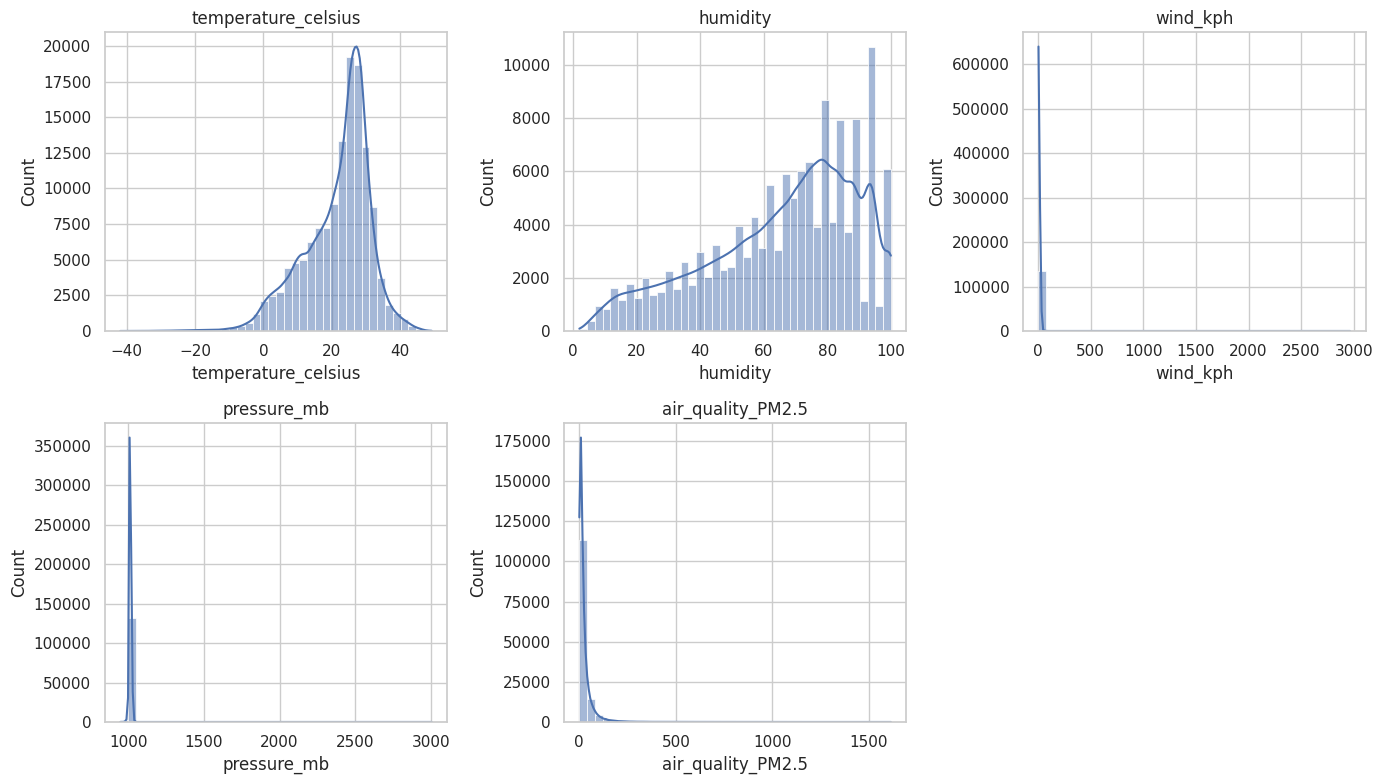

In [ ]:
#distributions of some key numeric features
plt.figure(figsize=(14,8))
plot_cols = ['temperature_celsius','humidity','wind_kph','pressure_mb','air_quality_PM2.5']
for i, col in enumerate(plot_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col].dropna(), bins=40, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()


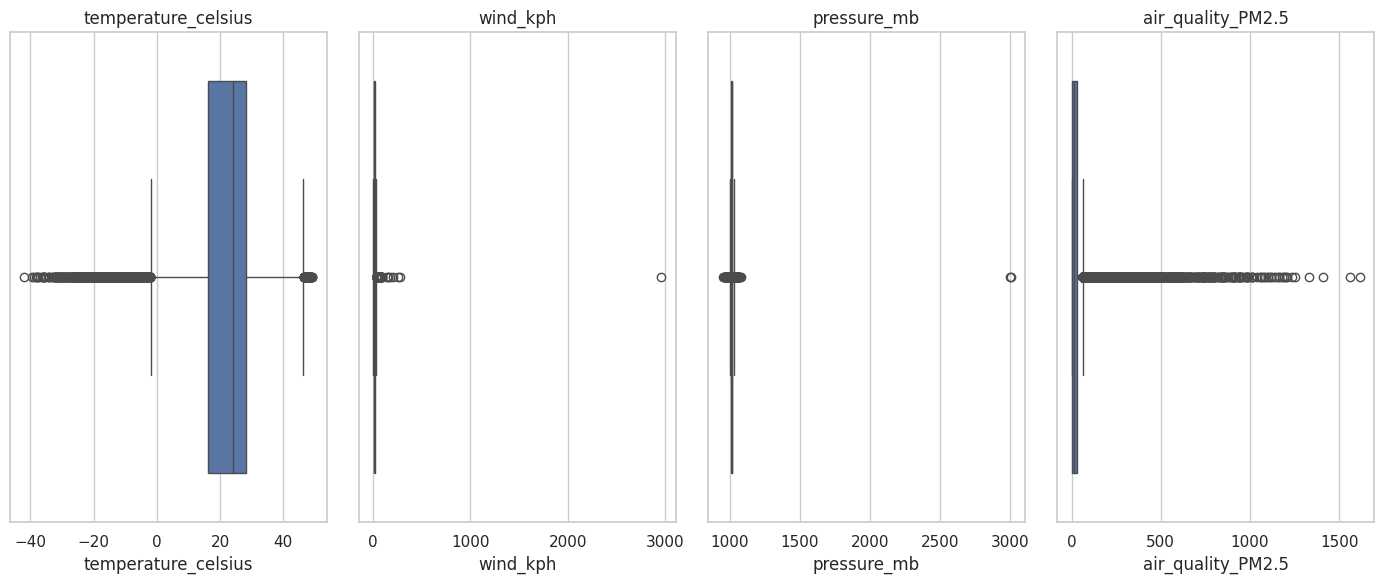

In [ ]:
#boxplots to highlight outliers
plt.figure(figsize=(14,6))
for i, col in enumerate(['temperature_celsius','wind_kph','pressure_mb','air_quality_PM2.5'], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x=df[col].dropna())
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
#clean obvious impossible values using domain knowledge

df_clean.loc[df_clean['wind_kph'] > 200, 'wind_kph'] = np.nan            # unrealistic winds > 200 kph
df_clean.loc[df_clean['wind_mph'] > 200, 'wind_mph'] = np.nan
df_clean.loc[df_clean['pressure_mb'] > 1100, 'pressure_mb'] = np.nan    # extremely high pressure
df_clean.loc[df_clean['temperature_celsius'] > 60, 'temperature_celsius'] = np.nan
df_clean.loc[df_clean['air_quality_PM2.5'] > 1000, 'air_quality_PM2.5'] = np.nan
df_clean.loc[df_clean['air_quality_PM10'] > 2000, 'air_quality_PM10'] = np.nan

print("Number of NaNs introduced by capping/cleaning:")
print(df_clean.isnull().sum() - df.isnull().sum())


NameError: name 'df_clean' is not defined

In [ ]:
#correlation heatmap for numeric features (after cleaning)
plt.figure(figsize=(12,10))
num = df_clean.select_dtypes(include=['float64','int64'])
corr = num.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.2)
plt.title("Correlation heatmap (numeric features)")
plt.show()

# show top correlations with temperature
temp_corr = corr['temperature_celsius'].sort_values(ascending=False)
print("Top correlations with temperature_celsius:")
print(temp_corr.head(10))


In [ ]:
# group by country and location_name for average temperature & PM2.5
country_summary = df_clean.groupby('country').agg(
    n_records=('temperature_celsius','count'),
    mean_temp=('temperature_celsius','mean'),
    median_temp=('temperature_celsius','median'),
    mean_pm25=('air_quality_PM2.5','mean')
).sort_values('n_records', ascending=False).reset_index()

# show top countries by records
display(country_summary.head(10))

# top 10 locations by mean temperature
top_temp_locations = df_clean.groupby('location_name')['temperature_celsius'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 locations by mean temperature:")
print(top_temp_locations)


In [ ]:
#daily average temperature trend (if multiple dates available)
if df_clean['date'].nunique() > 1:
    daily_avg = df_clean.groupby('date')['temperature_celsius'].mean()
    plt.figure(figsize=(12,4))
    daily_avg.plot()
    plt.title("Daily Average Temperature")
    plt.ylabel("Temperature (°C)")
    plt.xlabel("Date")
    plt.tight_layout()
    plt.show()
else:
    print("Dataset appears single-date; no multi-day trend to show.")


In [ ]:
# scatter plots to inspect relationships between weather and PM2.5
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x='humidity', y='air_quality_PM2.5', data=df_clean, alpha=0.3)
plt.title('Humidity vs PM2.5')
plt.subplot(1,2,2)
sns.scatterplot(x='wind_kph', y='air_quality_PM2.5', data=df_clean, alpha=0.3)
plt.title('Wind (kph) vs PM2.5')
plt.tight_layout()
plt.show()


In [ ]:

df_clean.to_csv("/content/weather_filled_cleaned.csv", index=False)
print("Saved cleaned dataset to /content/weather_filled_cleaned.csv")
